## Homework Linear Regression

- The dataset you are working is Boston Housing Price

- The Boston_Housing_Prices dataset is a famous dataset usually used for learning or benchmarking regression techniques. This dataset contains 14 variables, one of which (MEDV, median value of home) we'll use as the target. 

- For this assignment, your task is to:

1- Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets) 

2- Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 

3- Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)

4- Train the model based on the train set. Use 75 percent of the data for train part. Use 25 percent of the data for test part.

Hint: `from sklearn.model_selection import train_test_split`

Hint: `X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)`

5 -Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

6- Compute, Mean-Square-Error (MSE) and R Squared score of your Model 

Hint: `from sklearn.metrics import r2_score`

Hint: `from sklearn.metrics import mean_squared_error`

### Reference for Columns:
* CRIM: Per capita crime rate by town
* ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
* INDUS: Proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: Nitric oxide concentration (parts per 10 million)
* RM: Average number of rooms per dwelling
* AGE: Proportion of owner-occupied units built prior to 1940
* DIS: Weighted distances to five Boston employment centers
* RAD: Index of accessibility to radial highways
* TAX: Full-value property tax rate per 10,000(dollars)
* PTRATIO: Pupil-teacher ratio by town
* B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
* LSTAT: Percentage of lower status of the population
* MEDV: Median value of owner-occupied homes in 1000s (dollars)

# 1) Read in the dataset using sklearn's load_boston() function (found in sklearn.datasets) 

In [170]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# load the data
boston = load_boston()

print(boston.data)
print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

print(bos.head())

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2 

In [171]:
# check for null values
# if there are null values, remove them with .dropna()
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

# 2) Perform some basic exploratory data analysis to get a feel for the data. Graph some stuff! 

In [116]:
bos['PRICE'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: PRICE, dtype: float64

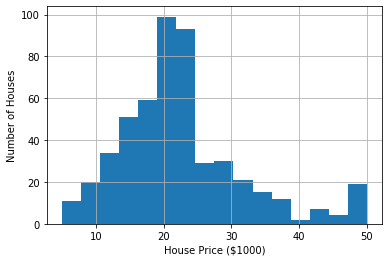

In [157]:
bos['PRICE'].hist(bins=16)
plt.xlabel("House Price ($1000)")
plt.ylabel("Number of Houses")
plt.show()

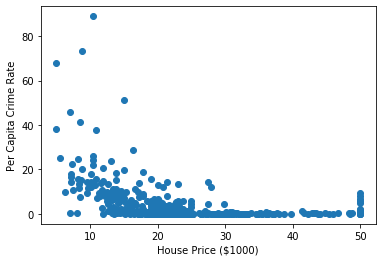

In [158]:
plt.scatter(x = bos['PRICE'], y = bos['CRIM'])
plt.xlabel("House Price ($1000)")
plt.ylabel("Per Capita Crime Rate")
plt.show()

# 3) Create a correlation heatmap to check to see how highly correlated our predictor variables (features) are (Remember, if our predictors are highly correlated, this is bad.)
* Note: use website for customizing heatmaps: https://seaborn.pydata.org/tutorial/color_palettes.html

## The heatmap is cut off on the top and bottom, this is an issue we discovered in DS 1.1

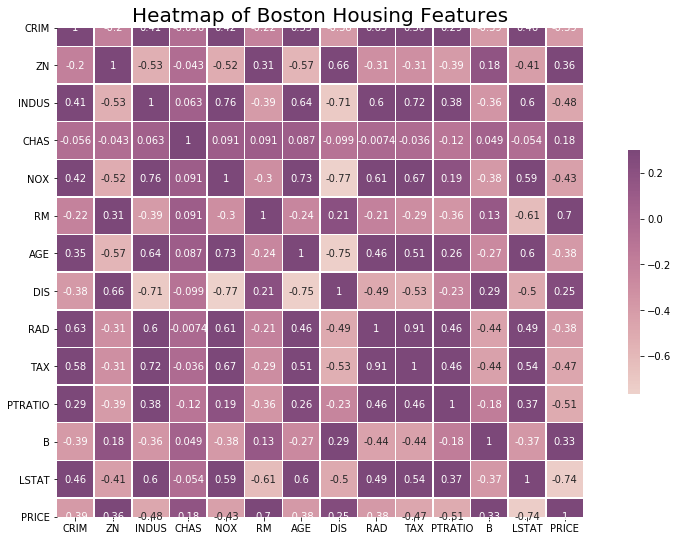

In [167]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 9))

# compute the correlation matrix
corr = bos.corr()

# sns.palplot(sns.cubehelix_palette(8))

# Generate a custom diverging colormap
cmap = sns.cubehelix_palette(8, as_cmap=True)


# Draw the heatmap with title
ax.set_title('Heatmap of Boston Housing Features', fontsize=20)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .5}, annot=True)

# 4) Train the model based on the train set. 
* Use 75 percent of the data for train part. 
* Use 25 percent of the data for test part.

In [120]:
print(bos.columns)
bos.shape

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')


(506, 14)

In [165]:
from sklearn.model_selection import train_test_split

col_features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
X = bos[col_features]
y = bos.PRICE

# test_size = 0.25 which is what we want to test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0) 

In [162]:
# Use 75% of the data for the train part: 506*0.75
bos.shape[0] * 0.75

379.5

In [163]:
# X_train should have 379 rows
print(X_train)

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD    TAX  \
245   0.19133  22.0   5.86   0.0  0.431  5.605  70.2  7.9549   7.0  330.0   
59    0.10328  25.0   5.13   0.0  0.453  5.927  47.2  6.9320   8.0  284.0   
276   0.10469  40.0   6.41   1.0  0.447  7.267  49.0  4.7872   4.0  254.0   
395   8.71675   0.0  18.10   0.0  0.693  6.471  98.8  1.7257  24.0  666.0   
416  10.83420   0.0  18.10   0.0  0.679  6.782  90.8  1.8195  24.0  666.0   
..        ...   ...    ...   ...    ...    ...   ...     ...   ...    ...   
323   0.28392   0.0   7.38   0.0  0.493  5.708  74.3  4.7211   5.0  287.0   
192   0.08664  45.0   3.44   0.0  0.437  7.178  26.3  6.4798   5.0  398.0   
117   0.15098   0.0  10.01   0.0  0.547  6.021  82.6  2.7474   6.0  432.0   
47    0.22927   0.0   6.91   0.0  0.448  6.030  85.5  5.6894   3.0  233.0   
172   0.13914   0.0   4.05   0.0  0.510  5.572  88.5  2.5961   5.0  296.0   

     PTRATIO       B  LSTAT  
245     19.1  389.13  18.46  
59      19.7  3

In [164]:
# Use 25% of the data for the test part
bos.shape[0]*0.25

126.5

In [166]:
# X_test should have 126 rows
print(X_test)

         CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
329   0.06724   0.0   3.24   0.0  0.460  6.333   17.2  5.2146   4.0  430.0   
371   9.23230   0.0  18.10   0.0  0.631  6.216  100.0  1.1691  24.0  666.0   
219   0.11425   0.0  13.89   1.0  0.550  6.373   92.4  3.3633   5.0  276.0   
403  24.80170   0.0  18.10   0.0  0.693  5.349   96.0  1.7028  24.0  666.0   
78    0.05646   0.0  12.83   0.0  0.437  6.232   53.7  5.0141   5.0  398.0   
..        ...   ...    ...   ...    ...    ...    ...     ...   ...    ...   
49    0.21977   0.0   6.91   0.0  0.448  5.602   62.0  6.0877   3.0  233.0   
498   0.23912   0.0   9.69   0.0  0.585  6.019   65.3  2.4091   6.0  391.0   
309   0.34940   0.0   9.90   0.0  0.544  5.972   76.7  3.1025   4.0  304.0   
124   0.09849   0.0  25.65   0.0  0.581  5.879   95.8  2.0063   2.0  188.0   
306   0.07503  33.0   2.18   0.0  0.472  7.420   71.9  3.0992   7.0  222.0   

     PTRATIO       B  LSTAT  
329     16.9  375.21   7.34  
371

# 5) Make predictions on your test set (X_test) and see how well it compares to the actual targets (y_test) from the test set.

In [20]:
bos_reg.predict(X_test)

array([24.95233283, 23.61699724, 29.20588553, 11.96070515, 21.33362042,
       19.46954895, 20.42228421, 21.52044058, 18.98954101, 19.950983  ,
        4.92468244, 16.09694058, 16.93599574,  5.33508402, 39.84434398,
       32.33549843, 22.32772572, 36.54017819, 31.03300611, 23.32172503,
       24.92086498, 24.26106474, 20.71504422, 30.45072552, 22.45009234,
        9.87470006, 17.70324412, 17.974775  , 35.69932012, 20.7940972 ,
       18.10554174, 17.68317865, 19.71354713, 23.79693873, 29.06528958,
       19.23738284, 10.97815878, 24.56199978, 17.32913052, 15.20340817,
       26.09337458, 20.87706795, 22.26187518, 15.32582693, 22.85847963,
       25.08887173, 19.74138819, 22.70744911,  9.66708558, 24.46175926,
       20.72654169, 17.52545047, 24.45596997, 30.10668865, 13.31250981,
       21.52052342, 20.65642932, 15.34285652, 13.7741129 , 22.07429287,
       17.53293957, 21.60707766, 32.91050188, 31.32796114, 17.64346364,
       32.69909854, 18.56579207, 19.32110821, 18.81256692, 23.04

# 6) Compute, Mean-Square-Error (MSE) and R Squared score of your Model 

In [196]:
from sklearn.linear_model import LinearRegression

# Instantiate the model(Linear Regression) and train it
bos_reg = LinearRegression()
bos_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [197]:
# coefficient
print(bos_reg.coef_)

[-1.17735289e-01  4.40174969e-02 -5.76814314e-03  2.39341594e+00
 -1.55894211e+01  3.76896770e+00 -7.03517828e-03 -1.43495641e+00
  2.40081086e-01 -1.12972810e-02 -9.85546732e-01  8.44443453e-03
 -4.99116797e-01]


In [198]:
# y-intercept
print(bos_reg.intercept_)

36.93325545711978


In [199]:
from sklearn.metrics import mean_squared_error

y_pred = bos_reg.predict(X_test)

mean_squared_error(y_test, y_pred)

29.7822450923024

In [22]:
# r^2 is rated from -1 to 1, the closer to 1 the better
from sklearn.metrics import r2_score

y_pred = bos_reg.predict(X_test)

r2_score(y_test, y_pred)

0.6354638433202124

## Apply data normalization (Scaling) to improve the prediction result

- Use StandardScaler and then train your Linear Regression Model. Compare the R Square score with previous one you got

- Use MinMaxScaler and then train your Linear Regression Model. Compare the R Square score with previous one you got

- Watch this video: https://www.youtube.com/watch?v=YKP31T5LIXQ

In [210]:
from sklearn.preprocessing import MinMaxScaler

# correct way for data normalization:
# min_max scaling puts the values in a range (0,1)

min_max_scaler = MinMaxScaler()

X_train_min_max = min_max_scaler.fit_transform(X_train) 

X_test_min_max = min_max_scaler.transform(X_test) # for x_test_scaled you must use .transform not .fit_transform

In [211]:
print(X_train_min_max)

[[0.00207947 0.22       0.19794721 ... 0.69148936 0.98040748 0.47460993]
 [0.00108981 0.25       0.17118768 ... 0.75531915 1.         0.21248227]
 [0.00110566 0.4        0.2181085  ... 0.53191489 0.98071007 0.12255319]
 ...
 [0.00162594 0.         0.35007331 ... 0.55319149 0.99397347 0.24312057]
 [0.0025059  0.         0.23643695 ... 0.56382979 0.98951031 0.48425532]
 [0.00149286 0.         0.13159824 ... 0.42553191 1.         0.36765957]]


In [212]:
print(X_test_min_max)

[[6.84726112e-04 0.00000000e+00 1.01906158e-01 ... 4.57446809e-01
  9.45307378e-01 1.59148936e-01]
 [1.03697791e-01 0.00000000e+00 6.46627566e-01 ... 8.08510638e-01
  9.22462051e-01 2.21276596e-01]
 [1.21310718e-03 0.00000000e+00 4.92302053e-01 ... 4.04255319e-01
  9.92031873e-01 2.48794326e-01]
 ...
 [3.85613648e-03 0.00000000e+00 3.46041056e-01 ... 6.17021277e-01
  9.98335771e-01 2.33758865e-01]
 [1.03596858e-03 0.00000000e+00 9.23387097e-01 ... 6.91489362e-01
  9.55822280e-01 4.49645390e-01]
 [7.72283834e-04 3.30000000e-01 6.30498534e-02 ... 6.17021277e-01
  1.00000000e+00 1.34468085e-01]]


### Use MinMaxScaler and then train your Linear Regression Model. Compare the R Square score with previous one you got

In [213]:
# Instantiate the model(Linear Regression) and train it using MinMax
bos_reg = LinearRegression()

bos_reg.fit(X_train_min_max, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [214]:
y_pred = bos_reg.predict(X_test_min_max)

y_pred

array([24.95233283, 23.61699724, 29.20588553, 11.96070515, 21.33362042,
       19.46954895, 20.42228421, 21.52044058, 18.98954101, 19.950983  ,
        4.92468244, 16.09694058, 16.93599574,  5.33508402, 39.84434398,
       32.33549843, 22.32772572, 36.54017819, 31.03300611, 23.32172503,
       24.92086498, 24.26106474, 20.71504422, 30.45072552, 22.45009234,
        9.87470006, 17.70324412, 17.974775  , 35.69932012, 20.7940972 ,
       18.10554174, 17.68317865, 19.71354713, 23.79693873, 29.06528958,
       19.23738284, 10.97815878, 24.56199978, 17.32913052, 15.20340817,
       26.09337458, 20.87706795, 22.26187518, 15.32582693, 22.85847963,
       25.08887173, 19.74138819, 22.70744911,  9.66708558, 24.46175926,
       20.72654169, 17.52545047, 24.45596997, 30.10668865, 13.31250981,
       21.52052342, 20.65642932, 15.34285652, 13.7741129 , 22.07429287,
       17.53293957, 21.60707766, 32.91050188, 31.32796114, 17.64346364,
       32.69909854, 18.56579207, 19.32110821, 18.81256692, 23.04

In [215]:
# MinMax Scaler r^2 score: 
r2_score(y_test, y_pred)

0.6354638433202124

In [216]:
# mean square error of MinMax Scaler
mean_squared_error(y_test, y_pred)

29.7822450923024

### Use StandardScaler and then train your Linear Regression Model. Compare the R Square score with previous one you got

In [203]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

X_train_std_scaler = std_scaler.fit_transform(X_train)

X_test_std_scaler = std_scaler.transform(X_test)

In [204]:
print(X_train_std_scaler)

[[-0.3906002   0.42637011 -0.74491444 ...  0.27878885  0.34049624
   0.82212111]
 [-0.40127639  0.5525335  -0.84901832 ...  0.55287698  0.42774893
  -0.46241699]
 [-0.40110543  1.18335044 -0.66648002 ... -0.40643148  0.34184377
  -0.90310809]
 ...
 [-0.3954927  -0.49882807 -0.15309105 ... -0.31506877  0.40091059
  -0.31227617]
 [-0.38599992 -0.49882807 -0.59517599 ... -0.26938741  0.38103449
   0.86938766]
 [-0.39692832 -0.49882807 -1.003035   ... -0.86324503  0.42774893
   0.29801844]]


In [205]:
print(X_test_std_scaler)

[[-0.4056463  -0.49882807 -1.11854752 ... -0.72620097  0.18418254
  -0.72377323]
 [ 0.7056307  -0.49882807  1.00060803 ...  0.78128376  0.08244389
  -0.41932101]
 [-0.39994626 -0.49882807  0.40022816 ... -0.95460774  0.39226392
  -0.28447232]
 ...
 [-0.37143398 -0.49882807 -0.16877794 ... -0.04098064  0.42033751
  -0.35815253]
 [-0.40185719 -0.49882807  2.07729878 ...  0.27878885  0.23100928
   0.69978415]
 [-0.40470175  0.8889692  -1.26971205 ... -0.04098064  0.42774893
  -0.84471999]]


In [206]:
# Instantiate the model(Linear Regression) and train it
bos_reg = LinearRegression()

bos_reg.fit(X_train_std_scaler, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [207]:
y_pred = bos_reg.predict(X_test_std_scaler)

y_pred

array([24.95233283, 23.61699724, 29.20588553, 11.96070515, 21.33362042,
       19.46954895, 20.42228421, 21.52044058, 18.98954101, 19.950983  ,
        4.92468244, 16.09694058, 16.93599574,  5.33508402, 39.84434398,
       32.33549843, 22.32772572, 36.54017819, 31.03300611, 23.32172503,
       24.92086498, 24.26106474, 20.71504422, 30.45072552, 22.45009234,
        9.87470006, 17.70324412, 17.974775  , 35.69932012, 20.7940972 ,
       18.10554174, 17.68317865, 19.71354713, 23.79693873, 29.06528958,
       19.23738284, 10.97815878, 24.56199978, 17.32913052, 15.20340817,
       26.09337458, 20.87706795, 22.26187518, 15.32582693, 22.85847963,
       25.08887173, 19.74138819, 22.70744911,  9.66708558, 24.46175926,
       20.72654169, 17.52545047, 24.45596997, 30.10668865, 13.31250981,
       21.52052342, 20.65642932, 15.34285652, 13.7741129 , 22.07429287,
       17.53293957, 21.60707766, 32.91050188, 31.32796114, 17.64346364,
       32.69909854, 18.56579207, 19.32110821, 18.81256692, 23.04

In [208]:
r2_score(y_pred, y_test)

0.4967900069591079

In [209]:
mean_squared_error(y_pred, y_test)

29.782245092302325

# Conclusions: 

### Without Scaling:
* MSE: 29.7822450923024
* R^2: 0.6354638433202124

### MinMaxScaler:
* MSE: 29.7822450923024
* R^2: 0.6354638433202124

### Standard Scaler:
* MSE: 29.782245092302325
* R^2: 0.4967900069591079